<a href="https://colab.research.google.com/github/damianleandro/My-first-works-for-the-Master-/blob/main/Example%20of%20basic%20EDA%20for%20analyze%20a%20DS%20about_BMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import folium
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [ ]:
df_bmw = pd.read_csv("/content/drive/MyDrive/(0000) - Data science/Procesamiento de datos /Clases/Entregable/bmw_pricing_v2.csv")

In [ ]:
df_bmw.head() 

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
type(df_bmw)

pandas.core.frame.DataFrame

In [ ]:
df_bmw.info() #Tenemos solo 3 datos númericos, 1 booleano y todos los demas son str. ¿Convendría empezar a pasar algunos a otras categorias? Para analizar 
              #Atención! Aparecen como STR pero son true y false, por lo cual habría que replantearse seriamente el tema. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df_bmw.describe().astype(int)

,km,potencia,precio
count,4841,4842,4837
mean,140959,128,15831
std,60208,38,9222
min,-64,0,100
25%,102884,100,10800
50%,141080,120,14200
75%,175217,135,18600
max,1000376,423,178500


In [ ]:
df_bmw["precio"].mean().astype(int)

15831

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e04d0e710>,
      dtype=object)

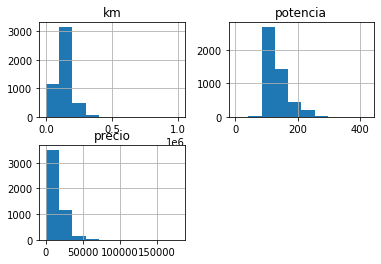

In [ ]:
df_bmw.hist()

In [ ]:
df_bmw["km"].min() #Elemento a revisar y modificar sin dudas

-64.0

In [ ]:
df_bmw_min = df_bmw[df_bmw["km"] < 0] #Se elimina
df_bmw_min


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,BMW,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01


In [ ]:
df_bmw = df_bmw.drop(labels=2938, axis=0) #La fórmula ideal para borrar líneas!! 

In [ ]:
df_bmw["km"].max() #Lo mismo que el anterior

1000376.0

In [ ]:
df_bmw_max = df_bmw[df_bmw["km"] > 400000] #Según información relevada, la vida útil de un motor de un coche diesel con mantenimiento es de hasta 400 mil KM 
df_bmw_max

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
557,BMW,520,484615.0,120.0,2011-02-01,diesel,blue,estate,True,True,False,False,False,False,True,False,8300.0,2018-03-01
1573,BMW,320,400654.0,110.0,2006-12-01,diesel,black,estate,False,False,True,False,False,False,True,False,1800.0,2018-07-01
2350,BMW,318,477571.0,85.0,2004-09-01,diesel,grey,hatchback,False,True,False,False,False,True,False,False,1200.0,2018-07-01
2829,BMW,525,439060.0,105.0,1996-10-01,diesel,silver,sedan,False,False,True,False,False,False,True,False,100.0,2018-03-01
3198,BMW,320,405816.0,100.0,2000-02-01,diesel,blue,sedan,False,False,False,False,False,False,True,False,500.0,2018-05-01
3732,BMW,118,1000376.0,90.0,2005-03-01,diesel,black,subcompact,True,False,False,False,False,False,True,False,1400.0,2018-06-01


In [ ]:
df_bmw = df_bmw.drop(labels=3732, axis=0)

In [ ]:
df_bmw.corr()

,km,potencia,gps,precio
km,1.000000,-0.047004,0.157596,-0.413334
potencia,-0.047004,1.000000,0.008780,0.638889
gps,0.157596,0.008780,1.000000,-0.005523
precio,-0.413334,0.638889,-0.005523,1.000000


In [ ]:
df_bmw_pmin = df_bmw[df_bmw["potencia"] <= 0] #Estaría bien borrarlo? Porque no puede ser un auto con el motor fundido por ejemplo?
df_bmw_pmin 

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3765,BMW,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,2018-03-01


In [ ]:
df_bmw_pmax = df_bmw[df_bmw["potencia"] >= 400]
df_bmw_pmax

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3601,BMW,M5,150187.0,412.0,2012-02-01,petrol,white,sedan,True,True,True,False,True,True,True,True,41600.0,2018-09-01
4146,BMW,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,True,True,False,False,False,True,True,82400.0,2018-04-01


In [ ]:
df_bmw[df_bmw.duplicated()] #No hay duplicados

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
df_bmw.isnull().sum() #Ahora sí sabemos donde están los nulos!! Momento de tomar decisiones

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [ ]:
df_bmw2 = df_bmw.copy()

In [ ]:
df_bmw2.fillna("No hay dato", inplace=True)

In [ ]:
df_bmw2.isnull().sum() #MUY BIEN YO. Quedó sin nulos. Los pocos que habían los reemplacé por "no hay dato" porque - considero - que son una muestra muy pequeña como para eliminarla.

marca                          0
modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

In [ ]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4839 non-null   object 
 1   modelo                       4838 non-null   object 
 2   km                           4839 non-null   float64
 3   potencia                     4840 non-null   float64
 4   fecha_registro               4840 non-null   object 
 5   tipo_gasolina                4836 non-null   object 
 6   color                        4829 non-null   object 
 7   tipo_coche                   4832 non-null   object 
 8   volante_regulable            4837 non-null   object 
 9   aire_acondicionado           4839 non-null   object 
 10  camara_trasera               4839 non-null   object 
 11  asientos_traseros_plegables  4837 non-null   object 
 12  elevalunas_electrico         4839 non-null   object 
 13  bluetooth         

In [ ]:
df_bmw2.info() #El problema que tengo ahora es como mantengo los números como tales, por cuando hice el reemplazo de datos se convirtieron en STR.  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   marca                        4841 non-null   object
 1   modelo                       4841 non-null   object
 2   km                           4841 non-null   object
 3   potencia                     4841 non-null   object
 4   fecha_registro               4841 non-null   object
 5   tipo_gasolina                4841 non-null   object
 6   color                        4841 non-null   object
 7   tipo_coche                   4841 non-null   object
 8   volante_regulable            4841 non-null   object
 9   aire_acondicionado           4841 non-null   object
 10  camara_trasera               4841 non-null   object
 11  asientos_traseros_plegables  4841 non-null   object
 12  elevalunas_electrico         4841 non-null   object
 13  bluetooth                    4841

In [ ]:
df_bmw[df_bmw["precio"].isnull()] #Comparé la columna de los NaN y no encontré dentro de los 3 más grandes ninguna fila compartida, por lo cual para mi, no es un problema. 

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,BMW,420,174740.0,135.0,2013-11-01,diesel,white,coupe,True,True,True,False,True,True,True,True,NaN,2018-05-01
524,BMW,520,163803.0,135.0,2013-07-01,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,2018-02-01
539,BMW,316,34489.0,85.0,2013-07-01,diesel,black,estate,True,False,False,False,False,False,True,False,NaN,2018-02-01
549,BMW,318,157129.0,100.0,2013-09-01,diesel,blue,estate,True,True,True,False,True,False,True,True,NaN,2018-03-01
569,BMW,320,166866.0,120.0,2014-05-01,diesel,blue,estate,True,True,False,False,True,True,True,True,NaN,2018-03-01
584,BMW,320,114771.0,135.0,2014-05-01,diesel,blue,estate,False,True,False,False,False,False,True,False,NaN,2018-03-01


In [ ]:
df_bmw2.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
df_bmw3 = df_bmw.copy()

In [ ]:
df_bmw3.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [ ]:
 df_bmw4 = pd.DataFrame(df_bmw3, columns=['precio', 'km', 'potencia','marca', 'modelo', 'fecha_registro','fecha_venta', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad', 'gps'])

In [ ]:
df_bmw4.dropna(how='all')

,precio,km,potencia,marca,modelo,fecha_registro,fecha_venta,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,gps
0,11300.0,140411.0,100.0,BMW,118,2012-02-01,2018-01-01,diesel,black,convertible,True,True,False,False,True,True,False,True
1,69700.0,13929.0,317.0,BMW,M4,2016-04-01,2018-02-01,petrol,grey,convertible,True,True,False,False,False,True,True,True
2,10200.0,183297.0,120.0,BMW,320,2012-04-01,2018-02-01,diesel,white,convertible,False,False,False,False,True,False,False,True
3,25100.0,128035.0,135.0,BMW,420,2014-07-01,2018-02-01,diesel,red,convertible,True,True,False,False,True,True,True,True
4,33400.0,97097.0,160.0,BMW,425,2014-12-01,2018-04-01,diesel,silver,convertible,True,True,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,14600.0,39743.0,110.0,BMW,218 Gran Tourer,2015-10-01,2018-08-01,diesel,black,van,False,True,False,False,False,False,False,True
4839,17500.0,49832.0,100.0,BMW,218 Active Tourer,2015-06-01,2018-08-01,diesel,grey,van,False,True,False,False,False,False,True,True
4840,17000.0,19633.0,110.0,BMW,218 Gran Tourer,2015-10-01,2018-09-01,diesel,grey,van,False,True,False,False,False,False,True,True
4841,22700.0,27920.0,110.0,BMW,218 Active Tourer,2016-04-01,2018-09-01,diesel,brown,van,True,True,False,False,False,False,True,True


In [ ]:
  df_bmw4.dropna(inplace=True)

In [ ]:
df_bmw4.isnull().sum()

precio                         0
km                             0
potencia                       0
marca                          0
modelo                         0
fecha_registro                 0
fecha_venta                    0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
alerta_lim_velocidad           0
gps                            0
dtype: int64

In [ ]:
df_bmw4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 0 to 4841
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       4779 non-null   float64
 1   km                           4779 non-null   float64
 2   potencia                     4779 non-null   float64
 3   marca                        4779 non-null   object 
 4   modelo                       4779 non-null   object 
 5   fecha_registro               4779 non-null   object 
 6   fecha_venta                  4779 non-null   object 
 7   tipo_gasolina                4779 non-null   object 
 8   color                        4779 non-null   object 
 9   tipo_coche                   4779 non-null   object 
 10  volante_regulable            4779 non-null   object 
 11  aire_acondicionado           4779 non-null   object 
 12  camara_trasera               4779 non-null   object 
 13  asientos_traseros_

In [ ]:
#CONVERSION 
df_bmw4["fecha_registro"]=df_bmw4["fecha_registro"].apply(pd.to_datetime)
df_bmw4["fecha_venta"]=df_bmw4["fecha_venta"].apply(pd.to_datetime)
df_bmw4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 0 to 4841
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   precio                       4779 non-null   float64       
 1   km                           4779 non-null   float64       
 2   potencia                     4779 non-null   float64       
 3   marca                        4779 non-null   object        
 4   modelo                       4779 non-null   object        
 5   fecha_registro               4779 non-null   datetime64[ns]
 6   fecha_venta                  4779 non-null   datetime64[ns]
 7   tipo_gasolina                4779 non-null   object        
 8   color                        4779 non-null   object        
 9   tipo_coche                   4779 non-null   object        
 10  volante_regulable            4779 non-null   object        
 11  aire_acondicionado           4779 non-null 

In [ ]:
df_bmw5 = df_bmw4.copy()
df_bmw5 = df_bmw5.astype({"bluetooth" : 'bool', "volante_regulable":'bool', "aire_acondicionado":'bool', "camara_trasera":'bool',  "asientos_traseros_plegables":'bool',  "elevalunas_electrico":'bool' , "alerta_lim_velocidad":"bool"})
df_bmw5 = pd.DataFrame(df_bmw5, columns= ['modelo','precio', 'km', 'potencia', 'fecha_registro','fecha_venta', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad', 'gps'])
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4779 non-null   object        
 1   precio                       4779 non-null   float64       
 2   km                           4779 non-null   float64       
 3   potencia                     4779 non-null   float64       
 4   fecha_registro               4779 non-null   datetime64[ns]
 5   fecha_venta                  4779 non-null   datetime64[ns]
 6   tipo_gasolina                4779 non-null   object        
 7   color                        4779 non-null   object        
 8   tipo_coche                   4779 non-null   object        
 9   volante_regulable            4779 non-null   bool          
 10  aire_acondicionado           4779 non-null   bool          
 11  camara_trasera               4779 non-null 

In [ ]:
df_bmw5["color"].value_counts() #Revisar si mantengo todos los colores o no --> Pensé en hacer un bool para que diga si es negro u otro pero no sé si sería lo correcto 

black     1612
grey      1162
blue       699
white      526
brown      340
silver     324
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64

In [ ]:
df_bmw5["tipo_gasolina"].value_counts() #No tendría sentido mantener los tipos que no sean diesel 

diesel           4574
petrol            189
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
df_bmw5["gps"].value_counts()

True     4457
False     322
Name: gps, dtype: int64

In [ ]:
for i in df_bmw5.columns:
    x = df_bmw5[i].value_counts()
    print(i, 
          x)

modelo 320                737
520                624
318                552
X3                 437
116                356
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64
precio 13100.0    67
14900.0    63
11900.0    60
14300.0    58
13400.0    57
           ..
47300.0     1
36200.0     1
39200.0     1
4700.0      1
45100.0     1
Name: precio, Length: 435, dtype: int64
km 129214.0    2
78156.0     2
72760.0     2
180606.0    2
121365.0    2
           ..
85814.0     1
206362.0    1
132357.0    1
174303.0    1
27920.0     1
Name: km, Length: 4723, dtype: int64
potencia 135.0    867
120.0    777
85.0     625
100.0    558
105.0    441
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: potencia, Length: 61, dtype: int64
fecha_registro 2013-07-01    168
2014-03-01    161
2014-05-01    148
2013-09-01    146
2013-10-01    143
        

In [ ]:
df_bmw5["tipo_coche"].value_counts() #Que conviene hacer con los que son pocos? Yo creo que dejarlos está bien porque son diferentes modelos --> NO eliminar los modelos bajos 

estate         1562
sedan          1166
suv            1056
hatchback       699
subcompact      112
coupe            96
convertible      47
van              41
Name: tipo_coche, dtype: int64

In [ ]:
df_bmw5[['tipo_gasolina']].apply(pd.Series.value_counts) #Conviene agrupar a los no-diesel en una categoria nueva? opino que estaría bien aunque serían 200 vs 4500

,tipo_gasolina
diesel,4574
petrol,189
hybrid_petrol,8
Diesel,5
electro,3


In [ ]:
print([df_bmw5])

[                 modelo   precio        km  potencia fecha_registro  \
0                   118  11300.0  140411.0     100.0     2012-02-01   
1                    M4  69700.0   13929.0     317.0     2016-04-01   
2                   320  10200.0  183297.0     120.0     2012-04-01   
3                   420  25100.0  128035.0     135.0     2014-07-01   
4                   425  33400.0   97097.0     160.0     2014-12-01   
...                 ...      ...       ...       ...            ...   
4837    218 Gran Tourer  13400.0   66770.0     110.0     2015-10-01   
4838    218 Gran Tourer  14600.0   39743.0     110.0     2015-10-01   
4839  218 Active Tourer  17500.0   49832.0     100.0     2015-06-01   
4840    218 Gran Tourer  17000.0   19633.0     110.0     2015-10-01   
4841  218 Active Tourer  22700.0   27920.0     110.0     2016-04-01   

     fecha_venta tipo_gasolina   color   tipo_coche  volante_regulable  \
0     2018-01-01        diesel   black  convertible               True  

In [ ]:
df_bmw5['tipo_gasolina'] = df_bmw5['tipo_gasolina'].replace(['Diesel'], 'diesel')
df_bmw5.groupby("tipo_gasolina").sum()

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,gps
tipo_gasolina,,,,,,,,,,,
diesel,72731200.0,646629873.0,586465.0,2525,3674,921,945,2111,1098,2480,4282
electro,62900.0,151641.0,275.0,2,3,0,0,0,0,2,3
hybrid_petrol,300600.0,715256.0,1230.0,6,7,1,2,3,1,8,7
petrol,2744100.0,24555574.0,28883.0,100,114,43,10,91,57,100,165


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e0461f790>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e04554f50>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e044fe510>]]


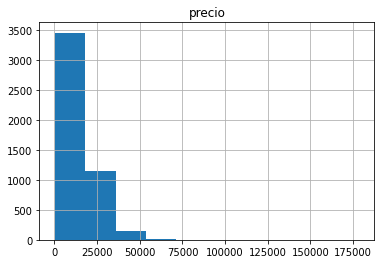

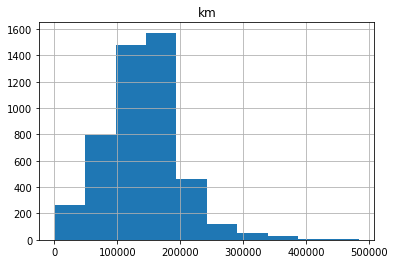

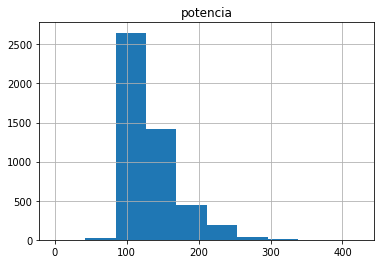

In [ ]:
for i in df_bmw5 :
  if df_bmw5[i].dtype.kind == "object":
    print(i,'\n', df_bmw5[i].value_counts(), '\n')
  elif (df_bmw5[i].dtype.kind=="f") or (df_bmw5[i].dtype.kind=="i"):
    print(df_bmw5.hist(i))

In [ ]:
df_bmw5.groupby(["fecha_venta"]).sum()

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,gps
fecha_venta,,,,,,,,,,,
2007-08-01,15800.0,142483.0,180.0,1,1,0,0,1,0,1,1
2008-06-01,8800.0,201102.0,85.0,1,0,0,0,0,0,0,1
2009-04-01,11500.0,181052.0,120.0,0,1,0,0,0,0,1,1
2010-04-01,8200.0,342768.0,135.0,0,1,0,0,1,0,0,1
2018-01-01,3029100.0,29684247.0,25777.0,100,158,37,30,91,42,110,190
2018-02-01,7854700.0,68403773.0,63821.0,249,400,111,97,246,136,282,454
2018-03-01,11398700.0,101650117.0,93673.0,371,572,126,141,336,160,398,658
2018-04-01,10918500.0,96462802.0,90366.0,339,518,124,129,323,166,382,618
2018-05-01,12956200.0,111604855.0,105970.0,460,644,181,144,375,213,472,744


In [ ]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4779 non-null   object        
 1   precio                       4779 non-null   float64       
 2   km                           4779 non-null   float64       
 3   potencia                     4779 non-null   float64       
 4   fecha_registro               4779 non-null   datetime64[ns]
 5   fecha_venta                  4779 non-null   datetime64[ns]
 6   tipo_gasolina                4779 non-null   object        
 7   color                        4779 non-null   object        
 8   tipo_coche                   4779 non-null   object        
 9   volante_regulable            4779 non-null   bool          
 10  aire_acondicionado           4779 non-null   bool          
 11  camara_trasera               4779 non-null 

In [ ]:
for col in ['fecha_registro', 'fecha_venta']:
    df_bmw5[col + '_NOMBREDIA'] = df_bmw5[col].dt.day_name()
#for dt.weekday_name:
    df_bmw5[col + '_DIA'] = df_bmw5[col].dt.day
    df_bmw5[col + '_MES'] = df_bmw5[col].dt.month
    df_bmw5[col + '_AÑO'] = df_bmw5[col].dt.year

    del df_bmw5[col]

df_bmw5.head()

,modelo,precio,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,alerta_lim_velocidad,gps,fecha_registro_NOMBREDIA,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
0,118,11300.0,140411.0,100.0,diesel,black,convertible,True,True,False,...,False,True,Wednesday,1,2,2012,Monday,1,1,2018
1,M4,69700.0,13929.0,317.0,petrol,grey,convertible,True,True,False,...,True,True,Friday,1,4,2016,Thursday,1,2,2018
2,320,10200.0,183297.0,120.0,diesel,white,convertible,False,False,False,...,False,True,Sunday,1,4,2012,Thursday,1,2,2018
3,420,25100.0,128035.0,135.0,diesel,red,convertible,True,True,False,...,True,True,Tuesday,1,7,2014,Thursday,1,2,2018
4,425,33400.0,97097.0,160.0,diesel,silver,convertible,True,True,False,...,True,True,Monday,1,12,2014,Sunday,1,4,2018


In [ ]:
target = ["precio"]

In [ ]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
      if (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f" ) and (i not in target) and (len(dataset[i].unique())!=2):
        lista_numericas.append(i)
      elif (dataset[i].dtype.kind == "b") and (i not in target) and (len(dataset[i].unique())==2):
        lista_boolean.append(i)
      elif (dataset[i].dtype.kind == "O") and (i not in target):
        lista_categoricas.append(i)


    return lista_numericas, lista_boolean,lista_categoricas

In [ ]:
l_num, l_bool, l_cat = obtener_lista_variables(df_bmw5)

In [ ]:
l_num

['km',
 'potencia',
 'fecha_registro_DIA',
 'fecha_registro_MES',
 'fecha_registro_AÑO',
 'fecha_venta_DIA',
 'fecha_venta_MES',
 'fecha_venta_AÑO']

In [ ]:
l_bool

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad',
 'gps']

In [ ]:
l_cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'fecha_registro_NOMBREDIA',
 'fecha_venta_NOMBREDIA']

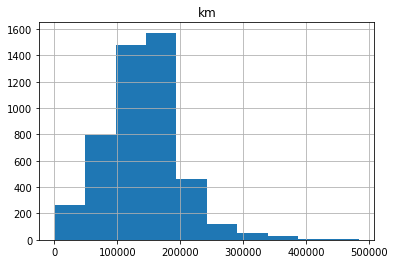

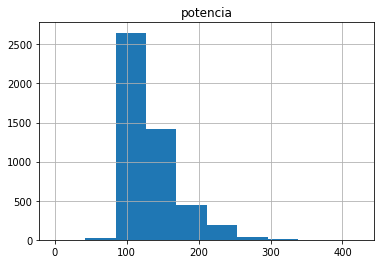

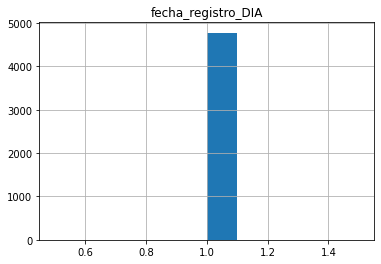

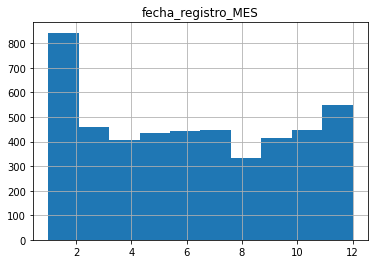

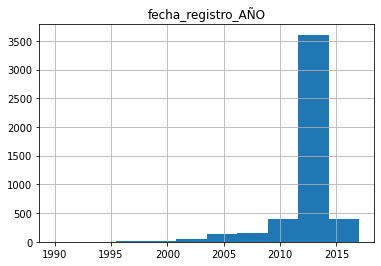

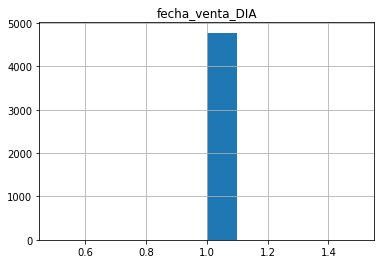

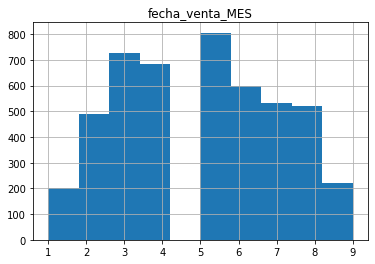

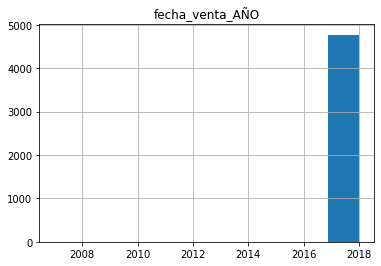

In [ ]:
for i in l_num:
  df_bmw5.hist(i) #Ir hacia un modelo más acotado. Recorte y limpieza. 

In [ ]:
corr = df_bmw5.corr()

In [ ]:
corr.style.background_gradient(cmap="winter")

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,gps,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
precio,1.000000,-0.411457,0.637856,0.268308,0.243778,0.252855,0.414277,0.262387,0.212391,0.444649,-0.009146,nan,-0.015646,0.448732,nan,0.013644,0.014164
km,-0.411457,1.000000,-0.044876,0.064202,0.017489,0.004826,-0.050059,0.051810,-0.029549,-0.037384,0.157032,nan,-0.014213,-0.508816,nan,-0.004022,-0.033482
potencia,0.637856,-0.044876,1.000000,0.327512,0.199488,0.313646,0.448445,0.342692,0.233993,0.489666,0.007659,nan,-0.000695,0.078577,nan,-0.028379,-0.001648
volante_regulable,0.268308,0.064202,0.327512,1.000000,0.307765,0.253952,0.232046,0.281144,0.134685,0.223782,0.242345,nan,-0.035756,-0.067334,nan,0.080355,-0.000097
aire_acondicionado,0.243778,0.017489,0.199488,0.307765,1.000000,0.149817,0.149453,0.284365,0.134645,0.224242,0.369736,nan,0.011682,0.228496,nan,0.010725,0.004119
camara_trasera,0.252855,0.004826,0.313646,0.253952,0.149817,1.000000,0.201574,0.199458,0.143114,0.201929,0.060343,nan,0.026847,-0.026148,nan,0.019948,0.014459
asientos_traseros_plegables,0.414277,-0.050059,0.448445,0.232046,0.149453,0.201574,1.000000,0.250102,0.155692,0.278472,0.126155,nan,-0.017270,0.058215,nan,0.033727,0.014383
elevalunas_electrico,0.262387,0.051810,0.342692,0.281144,0.284365,0.199458,0.250102,1.000000,0.256449,0.335296,0.201890,nan,-0.005283,0.088032,nan,-0.023479,-0.002226
bluetooth,0.212391,-0.029549,0.233993,0.134685,0.134645,0.143114,0.155692,0.256449,1.000000,0.122102,0.128436,nan,-0.003790,0.072618,nan,-0.011860,0.016237
alerta_lim_velocidad,0.444649,-0.037384,0.489666,0.223782,0.224242,0.201929,0.278472,0.335296,0.122102,1.000000,-0.062811,nan,-0.003364,0.179942,nan,-0.041653,0.000902


In [ ]:
df_bmw6 = df_bmw5.copy()

In [ ]:
del df_bmw6["fecha_registro_DIA"]

In [ ]:
del df_bmw6["fecha_registro_MES"]

In [ ]:
del df_bmw6["fecha_registro_AÑO"]

In [ ]:
del df_bmw6["fecha_venta_DIA"]

In [ ]:
del df_bmw6["fecha_venta_MES"]

In [ ]:
del df_bmw6["fecha_venta_AÑO"]

In [ ]:
del df_bmw6["gps"]

In [ ]:
del df_bmw6["modelo"]

In [ ]:
corr2 = df_bmw6.corr()

In [ ]:
corr2.style.background_gradient(cmap="hot") #¿Está raro? 

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad
precio,1.000000,-0.411457,0.637856,0.268308,0.243778,0.252855,0.414277,0.262387,0.212391,0.444649
km,-0.411457,1.000000,-0.044876,0.064202,0.017489,0.004826,-0.050059,0.051810,-0.029549,-0.037384
potencia,0.637856,-0.044876,1.000000,0.327512,0.199488,0.313646,0.448445,0.342692,0.233993,0.489666
volante_regulable,0.268308,0.064202,0.327512,1.000000,0.307765,0.253952,0.232046,0.281144,0.134685,0.223782
aire_acondicionado,0.243778,0.017489,0.199488,0.307765,1.000000,0.149817,0.149453,0.284365,0.134645,0.224242
camara_trasera,0.252855,0.004826,0.313646,0.253952,0.149817,1.000000,0.201574,0.199458,0.143114,0.201929
asientos_traseros_plegables,0.414277,-0.050059,0.448445,0.232046,0.149453,0.201574,1.000000,0.250102,0.155692,0.278472
elevalunas_electrico,0.262387,0.051810,0.342692,0.281144,0.284365,0.199458,0.250102,1.000000,0.256449,0.335296
bluetooth,0.212391,-0.029549,0.233993,0.134685,0.134645,0.143114,0.155692,0.256449,1.000000,0.122102
alerta_lim_velocidad,0.444649,-0.037384,0.489666,0.223782,0.224242,0.201929,0.278472,0.335296,0.122102,1.000000


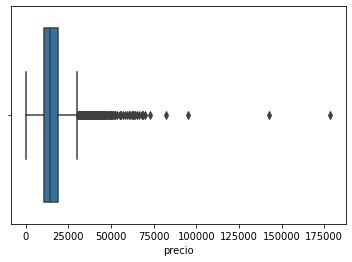

In [ ]:
sns.boxplot(x=df_bmw5["precio"])

In [ ]:
df_bmw6["log_precio"]=np.log10(df_bmw6["precio"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e03f0d150>]],
      dtype=object)

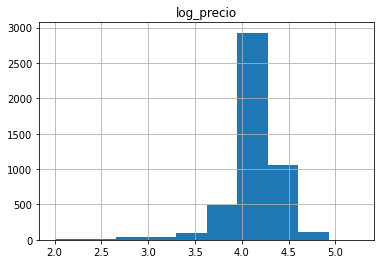

In [ ]:
df_bmw6.hist("log_precio") #Indagar bien que significa "log_precio" y si esto representa bien lo que necesito hacer ---> Convendría reducir el precio más alto y hacer una torre más baja?

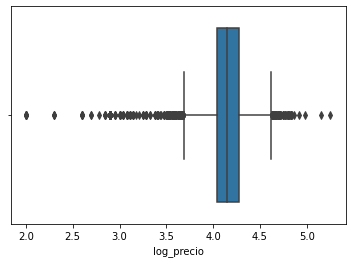

In [ ]:
sns.boxplot(x=df_bmw6["log_precio"])

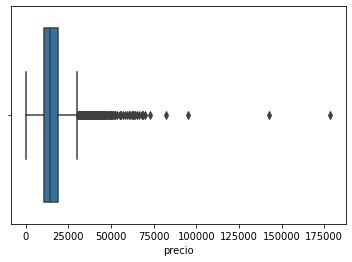

In [ ]:
sns.boxplot(x=df_bmw6["precio"])

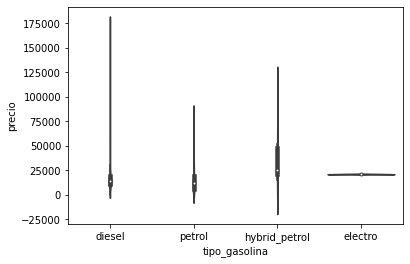

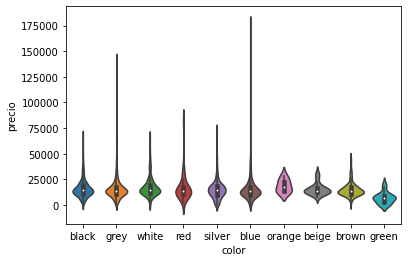

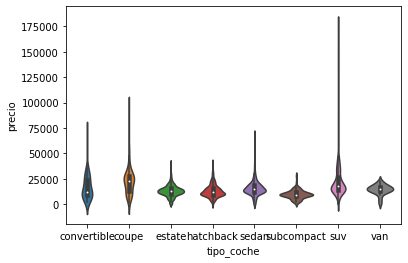

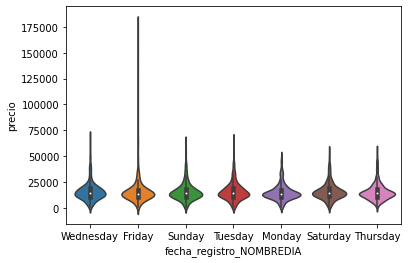

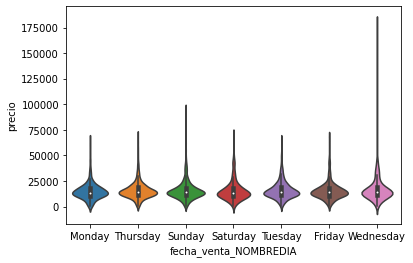

In [ ]:
for i in df_bmw6:
  if (df_bmw6[i].dtype.kind =="O"):
    plt.figure()
    sns.violinplot(x=i,y="precio", data=df_bmw6)
  #Habría que ver que es lo que tienen en común las variables. A priori podemos ver que todos juegan en la misma categoria de precios salvo los deslices para arriba. 

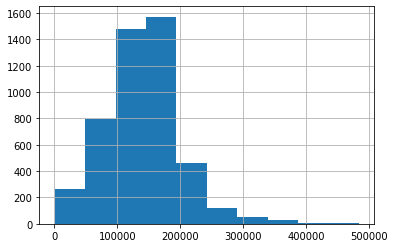

In [ ]:
df_bmw6["km"].hist()

In [ ]:
#sns.scatterplot(x="km", y="precio", hue="modelo", data=df_bmw6) #Quiero recortar los datos que están muy por fuera de la mayoría

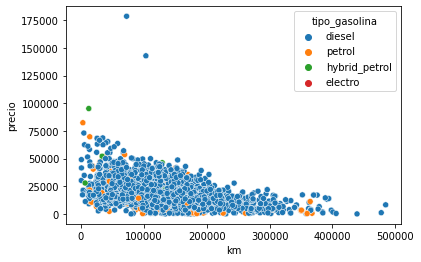

In [ ]:
sns.scatterplot(x="km", y="precio", hue="tipo_gasolina", data=df_bmw6) #Confirmado no hay razón para mentener los otros tipos de combustibles

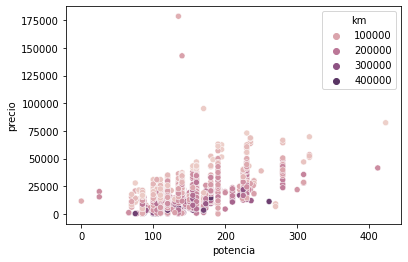

In [ ]:
sns.scatterplot(x="potencia", y="precio", hue="km", data=df_bmw6)

In [ ]:
#df_bmw6["modelo"].hist()

In [ ]:
#df_bmw6.groupby("modelo")["modelo"].count()

In [ ]:
#len(df_bmw6.groupby("modelo"))

In [ ]:
#df_bmw6[['modelo']].apply(pd.Series.value_counts) #Debate: Debo o no debo borrar los modelos para poder hacer el análisis de precio. Agregado: debo o no debo restringirlos a cantidades "representativas"

In [ ]:
df_bmw6.info() #Con object no puedo crear ningun modelo. Debo pasarlos a números

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 0 to 4841
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       4779 non-null   float64
 1   km                           4779 non-null   float64
 2   potencia                     4779 non-null   float64
 3   tipo_gasolina                4779 non-null   object 
 4   color                        4779 non-null   object 
 5   tipo_coche                   4779 non-null   object 
 6   volante_regulable            4779 non-null   bool   
 7   aire_acondicionado           4779 non-null   bool   
 8   camara_trasera               4779 non-null   bool   
 9   asientos_traseros_plegables  4779 non-null   bool   
 10  elevalunas_electrico         4779 non-null   bool   
 11  bluetooth                    4779 non-null   bool   
 12  alerta_lim_velocidad         4779 non-null   bool   
 13  fecha_registro_NOM

In [ ]:
for i in df_bmw6:
  print(i) 

precio
km
potencia
tipo_gasolina
color
tipo_coche
volante_regulable
aire_acondicionado
camara_trasera
asientos_traseros_plegables
elevalunas_electrico
bluetooth
alerta_lim_velocidad
fecha_registro_NOMBREDIA
fecha_venta_NOMBREDIA
log_precio


In [ ]:
for i in df_bmw6:
  print(df_bmw6[i].value_counts()) #Me genera el siguiente debate: debo ir por los datos cuantitativos o cualitativos?
  #Esto sirve para todo. Por ejemplo para los KM, debería mantenerlos al haber tanta variedad? yo creo que sí. 

13100.0    67
14900.0    63
11900.0    60
14300.0    58
13400.0    57
           ..
47300.0     1
36200.0     1
39200.0     1
4700.0      1
45100.0     1
Name: precio, Length: 435, dtype: int64
129214.0    2
78156.0     2
72760.0     2
180606.0    2
121365.0    2
           ..
85814.0     1
206362.0    1
132357.0    1
174303.0    1
27920.0     1
Name: km, Length: 4723, dtype: int64
135.0    867
120.0    777
85.0     625
100.0    558
105.0    441
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: potencia, Length: 61, dtype: int64
diesel           4579
petrol            189
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64
black     1612
grey      1162
blue       699
white      526
brown      340
silver     324
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64
estate         1562
sedan          1166
suv            1056
hatchback       699
subcompact      112
coupe            96
convertible  

In [ ]:
#df_bmw6['modelo'].value_counts()

In [ ]:
df_bmw7 = df_bmw6.copy() #Voy a probar todo lo anterior
df_bmw7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 0 to 4841
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       4779 non-null   float64
 1   km                           4779 non-null   float64
 2   potencia                     4779 non-null   float64
 3   tipo_gasolina                4779 non-null   object 
 4   color                        4779 non-null   object 
 5   tipo_coche                   4779 non-null   object 
 6   volante_regulable            4779 non-null   bool   
 7   aire_acondicionado           4779 non-null   bool   
 8   camara_trasera               4779 non-null   bool   
 9   asientos_traseros_plegables  4779 non-null   bool   
 10  elevalunas_electrico         4779 non-null   bool   
 11  bluetooth                    4779 non-null   bool   
 12  alerta_lim_velocidad         4779 non-null   bool   
 13  fecha_registro_NOM

In [ ]:
df_bmw7.groupby("tipo_gasolina").sum()

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,log_precio
tipo_gasolina,,,,,,,,,,,
diesel,72731200.0,646629873.0,586465.0,2525,3674,921,945,2111,1098,2480,18939.104350
electro,62900.0,151641.0,275.0,2,3,0,0,0,0,2,12.964545
hybrid_petrol,300600.0,715256.0,1230.0,6,7,1,2,3,1,8,35.973579
petrol,2744100.0,24555574.0,28883.0,100,114,43,10,91,57,100,754.680240


In [ ]:
df_bmw7['tipo_gasolina'] = df_bmw7['tipo_gasolina'].replace(['electro'], 'no_diesel') #Podría haber sido un for o algo que vaya todo junto 

In [ ]:
df_bmw7['tipo_gasolina'] = df_bmw7['tipo_gasolina'].replace(['hybrid_petrol'], 'no_diesel')

In [ ]:
df_bmw7['tipo_gasolina'] = df_bmw7['tipo_gasolina'].replace(['petrol'], 'no_diesel')

In [ ]:
df_bmw7.value_counts("tipo_gasolina") #Se elimina el tipo de gasolina como dato 

tipo_gasolina
diesel       4579
no_diesel     200
dtype: int64

In [ ]:
df_bmw8 = pd.get_dummies(data=df_bmw7, #Aquí inicia el modelo con el df_bmw8
                         )

In [ ]:
le = LabelEncoder()

In [ ]:
#df_bmw8["modelo"]=le.fit_transform(df_bmw7["modelo"])

In [ ]:
df_bmw8["potencia"]=le.fit_transform(df_bmw7["potencia"])

In [ ]:
df_bmw8["color"]=le.fit_transform(df_bmw7["color"])

In [ ]:
df_bmw8["tipo_coche"]=le.fit_transform(df_bmw7["tipo_coche"])

In [ ]:
corr3 = df_bmw8.corr()

In [ ]:
corr3.style.background_gradient(cmap="bone_r")

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,log_precio,tipo_gasolina_diesel,tipo_gasolina_no_diesel,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,fecha_registro_NOMBREDIA_Friday,fecha_registro_NOMBREDIA_Monday,fecha_registro_NOMBREDIA_Saturday,fecha_registro_NOMBREDIA_Sunday,fecha_registro_NOMBREDIA_Thursday,fecha_registro_NOMBREDIA_Tuesday,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,color,tipo_coche
precio,1.000000,-0.411457,0.624322,0.268308,0.243778,0.252855,0.414277,0.262387,0.212391,0.444649,0.809168,0.007529,-0.007529,-0.000527,0.024501,-0.033236,-0.015055,-0.057987,-0.013848,0.011561,0.007903,-0.028505,0.062361,0.013736,0.105581,-0.205779,-0.116159,0.006314,-0.102926,0.326618,-0.013584,0.010997,-0.032659,0.013492,-0.005292,-0.009780,0.008886,0.013939,-0.018914,-0.021710,-0.006118,-0.006312,-0.002675,0.010070,0.038640,0.020987,0.269860
km,-0.411457,1.000000,-0.032784,0.064202,0.017489,0.004826,-0.050059,0.051810,-0.029549,-0.037384,-0.435073,0.047968,-0.047968,-0.018573,0.038917,-0.016547,-0.023519,0.057416,0.028539,-0.031235,-0.027333,0.020925,-0.069972,-0.029914,-0.066639,0.183920,-0.112632,0.066176,-0.043620,-0.113542,-0.096298,0.003934,0.003907,-0.027363,0.004991,-0.022306,0.025317,0.010758,-0.003959,0.020038,-0.007833,0.014772,-0.006080,-0.016513,0.004195,-0.041754,-0.136401
potencia,0.624322,-0.032784,1.000000,0.334126,0.204072,0.314455,0.464523,0.377660,0.233201,0.524708,0.512361,-0.101969,0.101969,-0.016016,0.045457,-0.022594,-0.074022,-0.015306,0.003993,0.013058,-0.014973,0.015037,0.011244,0.037028,0.120236,-0.038433,-0.245629,0.032318,-0.172527,0.245527,-0.057960,-0.034207,-0.029050,0.007093,0.016395,0.008799,0.019461,0.011078,-0.034138,-0.008818,-0.031818,0.005466,0.017437,0.030352,-0.005183,0.002548,0.135714
volante_regulable,0.268308,0.064202,0.334126,1.000000,0.307765,0.253952,0.232046,0.281144,0.134685,0.223782,0.251334,0.004602,-0.004602,-0.016371,0.017676,0.004624,0.043656,0.014304,0.052753,0.008248,-0.033157,-0.024279,-0.108611,0.055869,0.027312,-0.001423,-0.152521,0.054451,-0.107635,0.103621,-0.052863,-0.013035,-0.019949,-0.032724,0.009122,-0.002051,0.021614,0.038634,0.018632,-0.024705,0.021662,-0.011987,-0.048772,0.017900,0.045050,-0.076395,0.047517
aire_acondicionado,0.243778,0.017489,0.204072,0.307765,1.000000,0.149817,0.149453,0.284365,0.134645,0.224242,0.338524,0.090410,-0.090410,0.013573,0.033859,-0.002220,0.049965,-0.027953,0.025998,-0.011241,-0.053097,-0.044289,-0.069567,-0.043848,-0.034318,0.097898,-0.087252,0.051083,-0.147286,-0.012776,-0.003279,-0.015671,0.000260,0.003783,-0.021381,0.019171,0.009380,0.004947,0.016218,-0.008553,0.002868,-0.026881,0.006918,0.004773,0.008558,-0.079529,-0.039028
camara_trasera,0.252855,0.004826,0.314455,0.253952,0.149817,1.000000,0.201574,0.199458,0.143114,0.201929,0.198643,-0.009410,0.009410,-0.024184,0.012675,0.001260,-0.013493,0.003109,0.002871,-0.017834,-0.021804,-0.002952,0.004642,-0.044848,0.020862,-0.034901,-0.047417,-0.007822,-0.040022,0.111521,-0.024184,0.011734,0.009105,-0.020636,-0.026832,-0.014496,0.001308,0.042231,-0.014747,-0.010315,0.013871,-0.014771,-0.010460,0.025403,0.017705,-0.003176,0.085561
asientos_traseros_plegables,0.414277,-0.050059,0.464523,0.232046,0.149453,0.201574,1.000000,0.250102,0.155692,0.278472,0.352751,0.073244,-0.073244,-0.001192,0.024546,-0.031037,-0.028650,0.020448,-0.019126,-0.002975,-0.006172,0.056404,0.001116,-0.049870,-0.023196,-0.151372,-0.153850,-0.129650,-0.077518,0.493432,-0.040879,-0.005930,-0.01

In [ ]:
minMaxResultado = MinMaxScaler()

In [ ]:
df_bmw8["km"]=minMaxResultado.fit_transform(df_bmw8["km"].values.reshape(-1, 1)) #Km

In [ ]:
df_bmw8["potencia"]=minMaxResultado.fit_transform(df_bmw8["potencia"].values.reshape(-1, 1)) #potencia

In [ ]:
df_bmw8.head()

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,...,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,color,tipo_coche
0,11300.0,0.289039,0.183333,True,True,False,False,True,True,False,...,1,0,1,0,0,0,0,0,1,0
1,69700.0,0.027787,0.966667,True,True,False,False,False,True,True,...,0,0,0,0,0,1,0,0,5,0
2,10200.0,0.377621,0.300000,False,False,False,False,True,False,False,...,0,0,0,0,0,1,0,0,9,0
3,25100.0,0.263476,0.400000,True,True,False,False,True,True,True,...,0,0,0,0,0,1,0,0,7,0
4,33400.0,0.199573,0.533333,True,True,False,False,False,True,True,...,0,0,0,0,1,0,0,0,8,0


In [ ]:
pd.to_pickle(df_bmw8,"/content/drive/MyDrive/(0000) - Data science/Procesamiento de datos /Clases/Entregable/DataFramePreProcesado" )

In [ ]:
df_bmwf = pd.read_pickle("/content/drive/MyDrive/(0000) - Data science/Procesamiento de datos /Clases/Entregable/DataFramePreProcesado")

In [ ]:
df_bmwf

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,...,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,color,tipo_coche
0,11300.0,0.289039,0.183333,True,True,False,False,True,True,False,...,1,0,1,0,0,0,0,0,1,0
1,69700.0,0.027787,0.966667,True,True,False,False,False,True,True,...,0,0,0,0,0,1,0,0,5,0
2,10200.0,0.377621,0.300000,False,False,False,False,True,False,False,...,0,0,0,0,0,1,0,0,9,0
3,25100.0,0.263476,0.400000,True,True,False,False,True,True,True,...,0,0,0,0,0,1,0,0,7,0
4,33400.0,0.199573,0.533333,True,True,False,False,False,True,True,...,0,0,0,0,1,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,13400.0,0.136932,0.250000,False,True,False,False,False,False,False,...,0,0,0,0,1,0,0,0,2,7
4838,14600.0,0.081107,0.250000,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,1,1,7
4839,17500.0,0.101946,0.183333,False,True,False,False,False,False,True,...,0,0,0,0,0,0,0,1,5,7
4840,17000.0,0.039569,0.250000,False,True,False,False,False,False,True,...,0,0,0,1,0,0,0,0,5,7


In [ ]:
df_bmw_final = df_bmwf.copy() #A borrar los dias de ventas 

In [ ]:
df_bmw_final.corr()

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,...,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,color,tipo_coche
precio,1.000000,-0.411457,0.624322,0.268308,0.243778,0.252855,0.414277,0.262387,0.212391,0.444649,...,0.013939,-0.018914,-0.021710,-0.006118,-0.006312,-0.002675,0.010070,0.038640,0.020987,0.269860
km,-0.411457,1.000000,-0.032784,0.064202,0.017489,0.004826,-0.050059,0.051810,-0.029549,-0.037384,...,0.010758,-0.003959,0.020038,-0.007833,0.014772,-0.006080,-0.016513,0.004195,-0.041754,-0.136401
potencia,0.624322,-0.032784,1.000000,0.334126,0.204072,0.314455,0.464523,0.377660,0.233201,0.524708,...,0.011078,-0.034138,-0.008818,-0.031818,0.005466,0.017437,0.030352,-0.005183,0.002548,0.135714
volante_regulable,0.268308,0.064202,0.334126,1.000000,0.307765,0.253952,0.232046,0.281144,0.134685,0.223782,...,0.038634,0.018632,-0.024705,0.021662,-0.011987,-0.048772,0.017900,0.045050,-0.076395,0.047517
aire_acondicionado,0.243778,0.017489,0.204072,0.307765,1.000000,0.149817,0.149453,0.284365,0.134645,0.224242,...,0.004947,0.016218,-0.008553,0.002868,-0.026881,0.006918,0.004773,0.008558,-0.079529,-0.039028
camara_trasera,0.252855,0.004826,0.314455,0.253952,0.149817,1.000000,0.201574,0.199458,0.143114,0.201929,...,0.042231,-0.014747,-0.010315,0.013871,-0.014771,-0.010460,0.025403,0.017705,-0.003176,0.085561
asientos_traseros_plegables,0.414277,-0.050059,0.464523,0.232046,0.149453,0.201574,1.000000,0.250102,0.155692,0.278472,...,0.012387,0.026351,-0.027614,0.002357,0.009240,-0.006848,-0.024301,0.014196,0.015311,0.378999
elevalunas_electrico,0.262387,0.051810,0.377660,0.281144,0.284365,0.199458,0.250102,1.000000,0.256449,0.335296,...,0.012876,-0.027938,-0.005542,-0.031060,0.006176,0.020699,0.003494,0.012316,-0.032653,-0.038031
bluetooth,0.212391,-0.029549,0.233201,0.134685,0.134645,0.143114,0.155692,0.256449,1.000000,0.122102,...,0.005700,0.024895,-0.017212,0.006491,-0.013352,0.001815,0.023535,-0.031749,0.019491,-0.037457
alerta_lim_velocidad,0.444649,-0.037384,0.524708,0.223782,0.224242,0.201929,0.278472,0.335296,0.122102,1.000000,...,0.008654,-0.036870,-0.000035,-0.030522,-0.009138,0.019705,0.039463,-0.002558,0.004449,0.088888


In [ ]:
del (df_bmw_final["log_precio"])

In [ ]:
#del (df_bmw_final["modelo"])

In [ ]:
#del (df_bmw_final['fecha_registro_MES'])

In [ ]:
#del (df_bmw_final['fecha_venta_MES'])

In [ ]:
df_bmw_final.drop(['fecha_registro_NOMBREDIA_Friday', 'fecha_registro_NOMBREDIA_Monday', 'fecha_registro_NOMBREDIA_Saturday', 'fecha_registro_NOMBREDIA_Sunday', 'fecha_registro_NOMBREDIA_Thursday','fecha_registro_NOMBREDIA_Tuesday', 'fecha_registro_NOMBREDIA_Wednesday', 'fecha_venta_NOMBREDIA_Friday', 'fecha_venta_NOMBREDIA_Monday', 'fecha_venta_NOMBREDIA_Saturday', 'fecha_venta_NOMBREDIA_Sunday', 'fecha_venta_NOMBREDIA_Thursday', 'fecha_venta_NOMBREDIA_Tuesday', 'fecha_venta_NOMBREDIA_Wednesday' ], axis=1, inplace=True)

In [ ]:
df_bmw_final.drop(['tipo_coche_van'], axis=1, inplace=True)

In [ ]:
corr4 = df_bmw_final.corr()

In [ ]:
corr4.style.background_gradient(cmap="winter") 

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,tipo_gasolina_diesel,tipo_gasolina_no_diesel,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,color,tipo_coche
precio,1.000000,-0.411457,0.624322,0.268308,0.243778,0.252855,0.414277,0.262387,0.212391,0.444649,0.007529,-0.007529,-0.000527,0.024501,-0.033236,-0.015055,-0.057987,-0.013848,0.011561,0.007903,-0.028505,0.062361,0.013736,0.105581,-0.205779,-0.116159,0.006314,-0.102926,0.326618,0.020987,0.269860
km,-0.411457,1.000000,-0.032784,0.064202,0.017489,0.004826,-0.050059,0.051810,-0.029549,-0.037384,0.047968,-0.047968,-0.018573,0.038917,-0.016547,-0.023519,0.057416,0.028539,-0.031235,-0.027333,0.020925,-0.069972,-0.029914,-0.066639,0.183920,-0.112632,0.066176,-0.043620,-0.113542,-0.041754,-0.136401
potencia,0.624322,-0.032784,1.000000,0.334126,0.204072,0.314455,0.464523,0.377660,0.233201,0.524708,-0.101969,0.101969,-0.016016,0.045457,-0.022594,-0.074022,-0.015306,0.003993,0.013058,-0.014973,0.015037,0.011244,0.037028,0.120236,-0.038433,-0.245629,0.032318,-0.172527,0.245527,0.002548,0.135714
volante_regulable,0.268308,0.064202,0.334126,1.000000,0.307765,0.253952,0.232046,0.281144,0.134685,0.223782,0.004602,-0.004602,-0.016371,0.017676,0.004624,0.043656,0.014304,0.052753,0.008248,-0.033157,-0.024279,-0.108611,0.055869,0.027312,-0.001423,-0.152521,0.054451,-0.107635,0.103621,-0.076395,0.047517
aire_acondicionado,0.243778,0.017489,0.204072,0.307765,1.000000,0.149817,0.149453,0.284365,0.134645,0.224242,0.090410,-0.090410,0.013573,0.033859,-0.002220,0.049965,-0.027953,0.025998,-0.011241,-0.053097,-0.044289,-0.069567,-0.043848,-0.034318,0.097898,-0.087252,0.051083,-0.147286,-0.012776,-0.079529,-0.039028
camara_trasera,0.252855,0.004826,0.314455,0.253952,0.149817,1.000000,0.201574,0.199458,0.143114,0.201929,-0.009410,0.009410,-0.024184,0.012675,0.001260,-0.013493,0.003109,0.002871,-0.017834,-0.021804,-0.002952,0.004642,-0.044848,0.020862,-0.034901,-0.047417,-0.007822,-0.040022,0.111521,-0.003176,0.085561
asientos_traseros_plegables,0.414277,-0.050059,0.464523,0.232046,0.149453,0.201574,1.000000,0.250102,0.155692,0.278472,0.073244,-0.073244,-0.001192,0.024546,-0.031037,-0.028650,0.020448,-0.019126,-0.002975,-0.006172,0.056404,0.001116,-0.049870,-0.023196,-0.151372,-0.153850,-0.129650,-0.077518,0.493432,0.015311,0.378999
elevalunas_electrico,0.262387,0.051810,0.377660,0.281144,0.284365,0.199458,0.250102,1.000000,0.256449,0.335296,-0.003608,0.003608,-0.022380,0.076559,-0.036246,-0.030818,-0.022648,-0.012857,0.014600,-0.026680,-0.035884,0.015165,0.009845,0.097850,0.043225,-0.096826,0.019562,-0.101761,0.032140,-0.032653,-0.038031
bluetooth,0.212391,-0.029549,0.233201,0.134685,0.134645,0.143114,0.155692,0.256449,1.000000,0.122102,-0.023479,0.023479,-0.020756,0.026945,0.005417,-0.057487,-0.002824,-0.038817,0.007571,0.036444,-0.020162,0.063646,0.067497,0.100229,-0.022746,0.016480,-0.022807,-0.045516,0.006551,0.019491,-0.037457
alerta_lim_velocidad,0.444649,-0.037384,0.524708,0.223782,0.224242,0.201929,0.278472,0.335296,0.122102,1.000000,-0.003375,0.003375,0.008105,0.034972,-0.027129,-0.034741,-0.025746,-0.009546,-0.014846,-0.027139,0.002350,0.030773,-0.002008,0.020871,0.013849,-0.173313,0.023548,-0.140746,0.156590,0.004449,0.088888


In [ ]:
X = df_bmw_final.drop("precio", axis=1) 

In [ ]:
y = df_bmw_final["precio"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=23)

In [ ]:
X_train.shape #Tiene menos de lo que venía trabajando

(2389, 30)

In [ ]:
#modelo clásico de regresión lineal
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train) #Esta es la línea que hace el modelo 

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
X_test

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,tipo_gasolina_diesel,...,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,color,tipo_coche
2514,0.345568,0.750000,True,True,True,True,True,False,True,1,...,0,0,0,0,0,1,0,0,1,4
1859,0.384559,0.216667,False,False,False,False,False,False,False,1,...,0,0,0,0,1,0,0,0,1,3
2480,0.086223,0.400000,False,False,False,False,False,False,True,1,...,0,0,0,0,0,1,0,0,1,4
4818,0.226305,0.383333,False,False,False,False,False,False,False,1,...,0,0,0,0,0,0,0,0,1,7
1198,0.113688,0.116667,False,True,False,False,False,False,False,1,...,0,0,0,1,0,0,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,0.137027,0.250000,False,True,False,False,True,False,True,1,...,0,0,0,0,1,0,0,0,8,3
3439,0.561481,0.500000,True,True,True,False,True,False,True,1,...,0,0,0,0,0,1,0,0,5,4
2073,0.398311,0.183333,False,True,False,False,False,False,True,1,...,0,0,0,0,1,0,0,0,3,3
1188,0.134230,0.216667,True,True,False,False,False,False,False,1,...,0,0,0,1,0,0,0,0,1,2


In [ ]:
y_pred

array([27544.24346479,  6987.51462208, 21378.94945519, ...,
       10178.94248787, 14518.23188504, 19358.98701837])

In [ ]:
y_test

2514    22300.0
1859     4900.0
2480    18200.0
4818     1300.0
1198    11200.0
         ...   
2100    16200.0
3439    12300.0
2073    12500.0
1188     9600.0
4834    14900.0
Name: precio, Length: 2390, dtype: float64

In [ ]:
#Que tan bueno es mi modelo? MALO MALO
print("MAE", metrics.mean_absolute_error(y_test, y_pred)) #Que pasó? Es probable que le haya dado información de más al modelo y se haya generado un problema de sobreentrenamiento 
#Conclusión provisional: volver a hacerlo con menos variables #Nueva duda: funcionan bien lo bools? 

MAE 3473.6218724654386


In [ ]:
print ("MSE", metrics.mean_squared_error(y_test, y_pred))

MSE 32747056.02657319


In [ ]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE 5722.504349196529


In [ ]:
df_resultados = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [ ]:
df_resultados["dif"]=df_resultados["Predicted"]-df_resultados["Actual"]

In [ ]:
df_resultados.sort_values(by="dif")

,Actual,Predicted,dif
4684,142800.0,22710.849479,-120089.150521
90,95200.0,25306.348864,-69893.651136
4146,82400.0,39723.916587,-42676.083413
1,69700.0,34746.507277,-34953.492723
3320,68300.0,35409.163802,-32890.836198
...,...,...,...
327,800.0,18621.450452,17821.450452
17,9200.0,27181.203536,17981.203536
213,800.0,21038.830283,20238.830283
37,6800.0,27185.038000,20385.038000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e038e7f50>]],
      dtype=object)

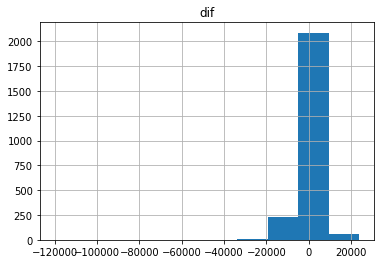

In [ ]:
df_resultados.hist("dif")